In [29]:
import numpy as np
import pandas as pd

In [30]:
df = pd.read_csv('Data_for_UCI_named.csv')

In [31]:
df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [32]:
df = df.drop('stab', axis=1)

In [33]:
df['stabf'].value_counts()

unstable    6380
stable      3620
Name: stabf, dtype: int64

In [34]:
df.isna().sum()

tau1     0
tau2     0
tau3     0
tau4     0
p1       0
p2       0
p3       0
p4       0
g1       0
g2       0
g3       0
g4       0
stabf    0
dtype: int64

In [35]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.drop('stabf',axis=1), df['stabf'], test_size= 0.2 , random_state= 1 )

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_std = scaler.fit_transform(x_train)
x_test_std = scaler.transform(x_test)

In [37]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=1)
rfc.fit(x_train_std,y_train)
rfc_predicted = rfc.predict(x_test_std)

In [42]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier(random_state=1)
etc.fit(x_train_std, y_train)
etc_predicted = etc.predict(x_test_std)

In [39]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=1)
xgb.fit(x_train_std, y_train)
xgb_predicted = xgb.predict(x_test_std)

C:\Users\Nasir Ibrahim\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:12:02] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [40]:
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier(random_state=1)
lgbm.fit(x_train_std, y_train)
lgbm_predicted = lgbm.predict(x_test_std)

In [45]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_true=y_test, y_pred=xgb_predicted)
print( 'Accuracy: {}' .format(round(accuracy* 100 ), 4 ))

Accuracy: 95


In [47]:
accuracy = accuracy_score(y_true=y_test, y_pred=lgbm_predicted)
print( 'Accuracy: {}' .format(round(accuracy* 100 ), 4 ))

Accuracy: 94


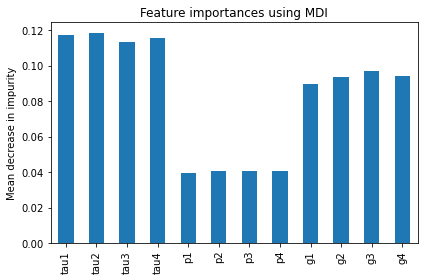

In [51]:
import matplotlib.pyplot as plt
importances = etc.feature_importances_
forest_importances = pd.Series(importances, index=x_train.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar()
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [52]:
accuracy = accuracy_score(y_true=y_test, y_pred=rfc_predicted)
print( 'Accuracy: {}' .format(round(accuracy* 100 ), 4 ))

Accuracy: 93
